1. Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:
-- Какого результата вы добились от нейросети?<br>
-- Что помогло вам улучшить её точность?

2. (по желанию ) Нарисуйте цифру от руки, преобразуйте как надо и подайте на вход вашей обученной нейронности, оцените точность предсказания.

In [50]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

Загружаем датасет:

In [51]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [52]:
input_shape = (28, 28, 1)

Нормируем данные:

In [53]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Строим модель урока:

In [54]:
model = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [55]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

На уроке сначала тренировали модель, потом проверяли на тестовых данных. А затем СНОВА тренировали модель и одновременно проверяли на тестовых данных, то есть тренировка модели была не 5 а 10 эпох. И соответственно графики точности и потрь тренированной модели строились сначала на диапазоне 0-4 эпохи, а затем тренировки и теста, но уже на эпохах 5-9.
Однако если их строить на эпохах 0-4, получим:

In [56]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3258 - accuracy: 0.9084 - val_loss: 0.1899 - val_accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1644 - accuracy: 0.9529 - val_loss: 0.1430 - val_accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.9638 - val_loss: 0.1275 - val_accuracy: 0.9613
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0988 - accuracy: 0.9705 - val_loss: 0.1060 - val_accuracy: 0.9672
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0821 - accuracy: 0.9756 - val_loss: 0.1034 - val_accuracy: 0.9686
CPU times: user 15.4 s, sys: 1.58 s, total: 17 s
Wall time: 21.5 s


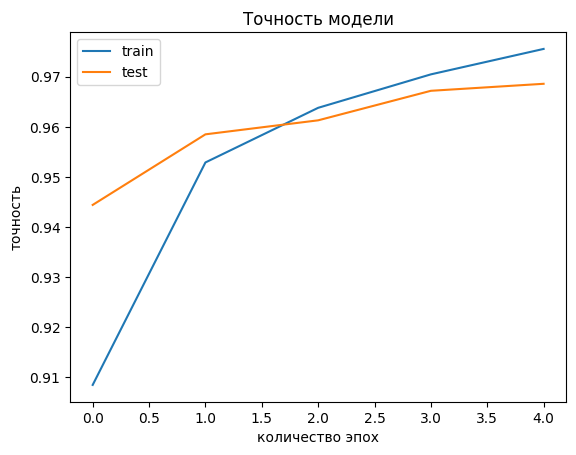

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


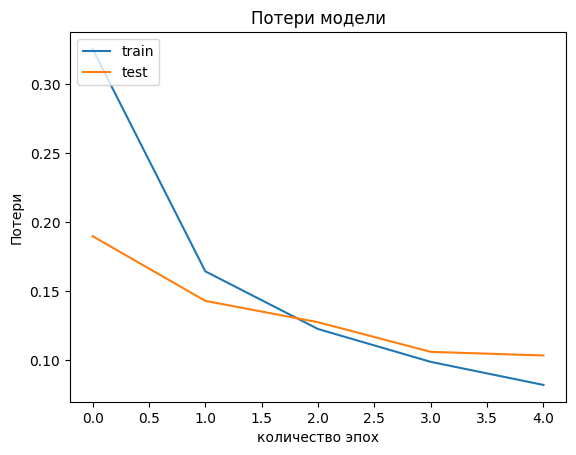

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ещё 5 эпох:

In [59]:
%%time

history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0704 - accuracy: 0.9788 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0607 - accuracy: 0.9812 - val_loss: 0.0958 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0995 - val_accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0466 - accuracy: 0.9863 - val_loss: 0.0972 - val_accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.1009 - val_accuracy: 0.9722
CPU times: user 15.1 s, sys: 1.21 s, total: 16.3 s
Wall time: 13.5 s


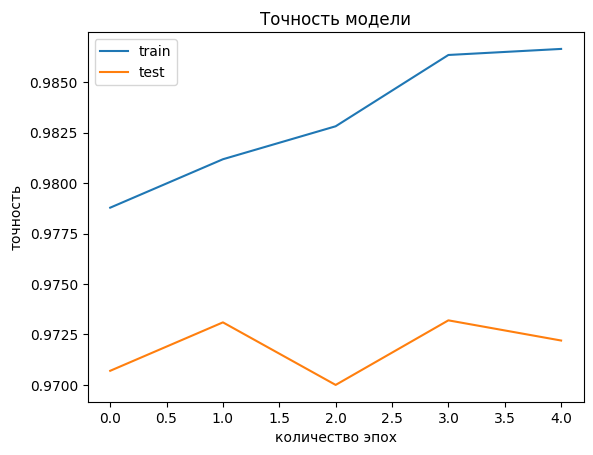

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

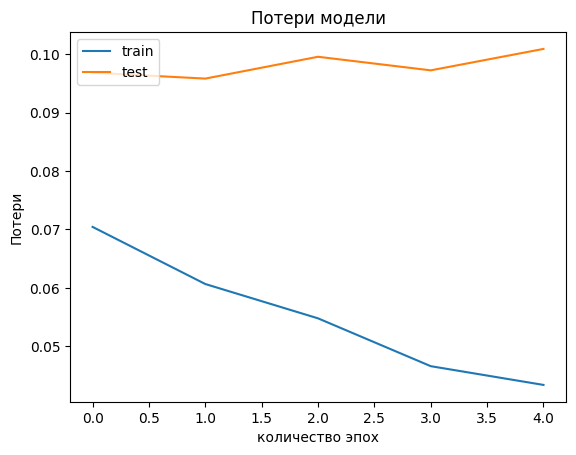

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Теперь попробуем поменять параметры модели.<br>
Строим новую модель с другими параметрами:

In [78]:
model_dom = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [79]:
model_dom.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [80]:
%%time

history = model_dom.fit(x_train, y_train_cat, batch_size=80, epochs=25, validation_data =(x_test, y_test_cat) )

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.3974 - accuracy: 0.8927 - val_loss: 0.2204 - val_accuracy: 0.9358
Epoch 2/25
750/750 [==============================] - 2s 2ms/step - loss: 0.1975 - accuracy: 0.9435 - val_loss: 0.1708 - val_accuracy: 0.9484
Epoch 3/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1507 - accuracy: 0.9572 - val_loss: 0.1344 - val_accuracy: 0.9616
Epoch 4/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9648 - val_loss: 0.1201 - val_accuracy: 0.9663
Epoch 5/25
750/750 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9695 - val_loss: 0.1117 - val_accuracy: 0.9671
Epoch 6/25
750/750 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9743 - val_loss: 0.1022 - val_accuracy: 0.9716
Epoch 7/25
750/750 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9771 - val_loss: 0.0958 - val_accuracy: 0.9709
Epoch 

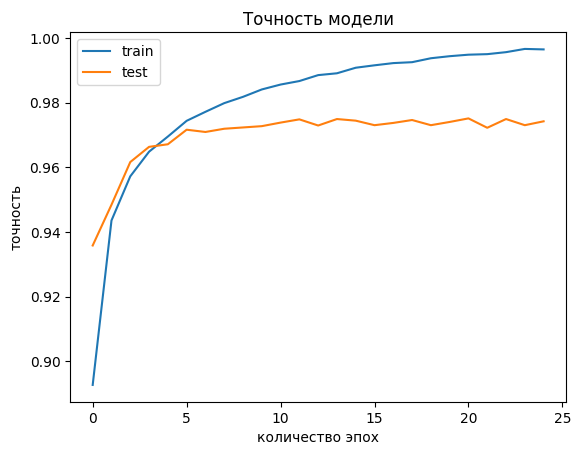

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

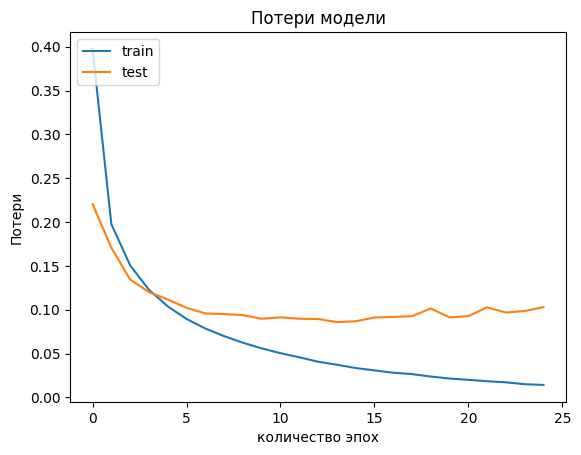

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Добились:
1. Повышения точности модели по сравнению с 5 эпохами на уроке.
2. Увеличения скорости тренировки в расчёте на 1 эпоху.<br>

# Вывод:
1. Увеличение количества эпох улучшает точность модели на тренировочных данных. Однако на тестовых данных, после определённого количества эпох точность расти перестаёт и появляется тенденция к еёснижению.
2. Увеличение batch_size ускоряет обучение - время на расчёт "эпохи" сокращается.
3. Наличие валидационной выборки препятствует переобучению - в момент (после определённого количества эпох), когда точность тестовых данных перестаёт расти стоит прекратить обучение.
4. Для данного примера оптимальным как по скорости, так и по точности будет модель с параметрами:<br>
batch_size=80, epochs=10
5. Добавление слоя в модель (Dense(25, activation = 'relu') между "50" и "10"), как и замена алгоритма (optimizer = 'RMSprop') к повышению точности и скорости не привело (эти расчёты не привёл, что бы не раздувать ДЗ).

Рисуем цифру, кодируем:

In [84]:
x=[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88,  88,  88,  46,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 135, 120, 135, 180, 240,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,  46,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 180,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 120,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 180,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 240,   0,   0,   0,   0, 180, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 240,   0,  60, 240, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60, 240, 180,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 240,  88, 240,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240, 165,   0,   0,   0, 240,  88,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0, 195,  88,   0,   0,   0,   0,   0, 240, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,  60, 165,   0,   0,   0,   0,   0,   0,   0, 195,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,  60, 165,   0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0, 240,   0,   0,   0,   0,   0,   0, 240,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 240, 165, 165, 165, 180, 240,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60,  60,  60,  60,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
   [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]

"Скармливаем" кодированную картинку обученной модели:

In [88]:
x = np.expand_dims(x, axis=0)
prediction = model_dom.predict(x)
prediction = np.argmax(prediction[0])
print("Цифра:", prediction)

1/1 [==============================] - 0s 44ms/step
Цифра: 8


Цифра распознана верно, что не удиваительно - картинка чёткая, а модель жорошо обучена (с точностью предсказаний выше 97%).